# Submission 3 - Final

**Instructions**
- Fill out the 'Basic Information','Complex Hypotheses - Findings / Insights', 'Black Hat Visualization' sections (replace the TODOs with your information)
  - If your visualization is interactive, create a short video that shows the interactivity (max. 3 min).
- Export the Jupyter notebook as a HTML file and save it in this repository.
  - Go to 'File' -> 'Save and Export Notebook As..' -> 'HTML'.
  - Save it locally in your project folder. You can leave the name as it is.
  - If you have a video, then add it to the project folder.
  - Push your local changes to the GitHub repository.
- Make sure all your files are up-to-date (pushed) in the Github repository.
  - Check if all Jupyter notebooks are executeable, theses will be the backup if there were problems with the HTML file submissions.
  - We will collect the protect via GitHub Classroom.

---
## Basic Information

**Team Name:** Wet Dragons

**Team Members:**
- Abhirup Mitra
- Alexandre Agostinho
- Michal Jeznach
- Senay	Mustafa

**Dataset Description:**  
(max. 75 words)

The datasets are about the hate crime statistics across the United States in the years 2013 and 2019. The crimes are classified under various parameters. There is state-by-state comparison, various motivations for the hate crimes (inlcuding but not limited to race, religion and gender identity) and the time of year when the crimes occurred. The visualizations aim to see if certain agency types have a higher crime rate and if hate crimes occur more at a certain time of year.

---
## Complex Hypotheses - Findings / Insights

**Instructions:**
- Add your visualizations (**max. 4**) here
  - The visualizations should show the findings / insights
- Add the descriptions for all your findings / insights (**max. 150 words**)
  - The description should also relate to the visualizations above.

In [1]:
#######visualization for q1#####

import pandas as pd
import plotly.express as px
import ipywidgets as widgets
from IPython.display import display
from plotly.offline import init_notebook_mode, iplot

init_notebook_mode(connected=True)

#loading and filtering the data

url="https://drive.google.com/file/d/1g9Kng_eeMCvdsNQVPiGG4pD2qgdI4k44/view?usp=sharing"
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
hate_crime_data_2013 = pd.read_csv(url)

crime_types = ['Race', 'Religion', 'Sexual orientation', 'Ethnicity', 'Disability', 'Gender', 'Gender Identity']

filtered_data = hate_crime_data_2013[hate_crime_data_2013['Agency type'].isin(['Cities', 'Universities and Colleges'])]
grouped_data = filtered_data.groupby(['State', 'Agency type'])[crime_types].sum().reset_index()

#dropdown menu 
crime_dropdown = widgets.Dropdown(
    options=crime_types + ['Total'],
    value=crime_types[0],
    description='View:'
)

#updates based on the dropdown
def update_plot(selected_crime_type):
    if selected_crime_type == 'Total':
        update_total_plot()
    else:
        fig = px.bar(grouped_data, x='State', y=selected_crime_type, color='Agency type',
                     labels={selected_crime_type: f'Hate Crimes - {selected_crime_type}'},
                     title=f'Hate Crimes for {selected_crime_type}, for each State and Agency Type')

        fig.update_layout(barmode='group', xaxis_title='State', yaxis_title='Total Hate Crimes')
        fig.show()

#total
def update_total_plot():
    total_fig = px.bar(grouped_data, x='State', y=crime_types, color='Agency type',
                       labels={'value': 'Total Hate Crimes'},
                       title='Total hate crimes for each State and Agency Type')

    total_fig.update_layout(barmode='group', xaxis_title='State', yaxis_title='Total Hate Crimes')
    total_fig.show()

# widget display
interactive_widget = widgets.interactive(update_plot, selected_crime_type=crime_dropdown)
display(interactive_widget)


interactive(children=(Dropdown(description='View:', options=('Race', 'Religion', 'Sexual orientation', 'Ethnic…

### Visualizations

In [2]:
###visualization for question 1###

import pandas as pd
import plotly.express as px
import dash
from dash import dcc, html
from dash.dependencies import Input, Output

# Load the data
url = "https://drive.google.com/file/d/1kog_ISQTr8_9sqjyvG8OtB-J4KnktSEL/view?usp=sharing"
url = 'https://drive.google.com/uc?id=' + url.split('/')[-2]

# Load your data
data = pd.read_csv(url)


# Add the state codes for the visualization purposes
state_codes_dict = {
    "Alabama": "AL", "Alaska": "AK", "Arizona": "AZ", "Arkansas": "AR", 
    "California": "CA", "Colorado": "CO", "Connecticut": "CT", "Delaware": "DE", 
    "Florida": "FL", "Georgia": "GA", "Hawaii": "HI", "Idaho": "ID", 
    "Illinois": "IL", "Indiana": "IN", "Iowa": "IA", "Kansas": "KS", 
    "Kentucky": "KY", "Louisiana": "LA", "Maine": "ME", "Maryland": "MD", 
    "Massachusetts": "MA", "Michigan": "MI", "Minnesota": "MN", "Mississippi": "MS", 
    "Missouri": "MO", "Montana": "MT", "Nebraska": "NE", "Nevada": "NV", 
    "New_Hampshire": "NH", "New Jersey": "NJ", "New Mexico": "NM", "New York": "NY", 
    "North Carolina": "NC", "North Dakota": "ND", "Ohio": "OH", "Oklahoma": "OK", 
    "Oregon": "OR", "Pennsylvania": "PA", "Rhode Island": "RI", "South Carolina": "SC", 
    "South Dakota": "SD", "Tennessee": "TN", "Texas": "TX", "Utah": "UT", 
    "Vermont": "VT", "Virginia": "VA", "Washington": "WA", "West Virginia": "WV", 
    "Wisconsin": "WI", "Wyoming": "WY"
}
data['state_code'] = data['State'].map(state_codes_dict)


# Create the interactive visualization
app = dash.Dash(__name__)
app.layout = html.Div([
    html.H1("Hate Crime in the US 2013"),
    
    # Dropdown menu for selecting the agency type
    dcc.Dropdown(
        id='agency-type-dropdown',
        options=[
            {'label': 'Cities', 'value': 'Cities'},
            {'label': 'Universities and Colleges', 'value': 'Universities and Colleges'}
        ],
        value='Cities',  # Set the initial value to 'Cities'
        style={'width': '50%'}
    ),

    
    # Graph for displaying the choropleth map
    dcc.Graph(id='choropleth-map'),
])

@app.callback(
    Output('choropleth-map', 'figure'),
    [Input('agency-type-dropdown', 'value')]
)
def update_choropleth(selected_agency_type):
    # Filter the data based on the selected agency type
    filtered_data = data[data['Agency type'] == selected_agency_type]

    # Aggregate data by state
    aggregated_data = filtered_data.groupby('state_code').agg({
        'Total Crimes': 'sum',
        'Population': 'sum'
    }).reset_index()

    # Calculate Crime Rate per 10,000 people
    aggregated_data['Crime Rate'] = (aggregated_data['Total Crimes'] / aggregated_data['Population']) * 10000

    # Define different scales for cities and universities
    city_scale = [0, 1]  # Example scale for cities
    university_scale = [0, 7]  # Example scale for universities and colleges

    # Choose the scale based on the selected agency type
    scale = city_scale if selected_agency_type == 'Cities' else university_scale

    # Create the choropleth map using aggregated data
    fig = px.choropleth(
        aggregated_data,
        locations="state_code",
        locationmode="USA-states",
        color="Crime Rate",
        color_continuous_scale="Oranges",
        labels={"Crime Rate": "Crime Rate per 10,000 People"},
        scope="usa",
        title=f"Hate Crime Rate in {selected_agency_type}",
        range_color=scale
    )

    return fig

if __name__ == '__main__':
    app.run_server(debug=True, port=8056) #the port number can vary depending on if/how many other visualizations are already present

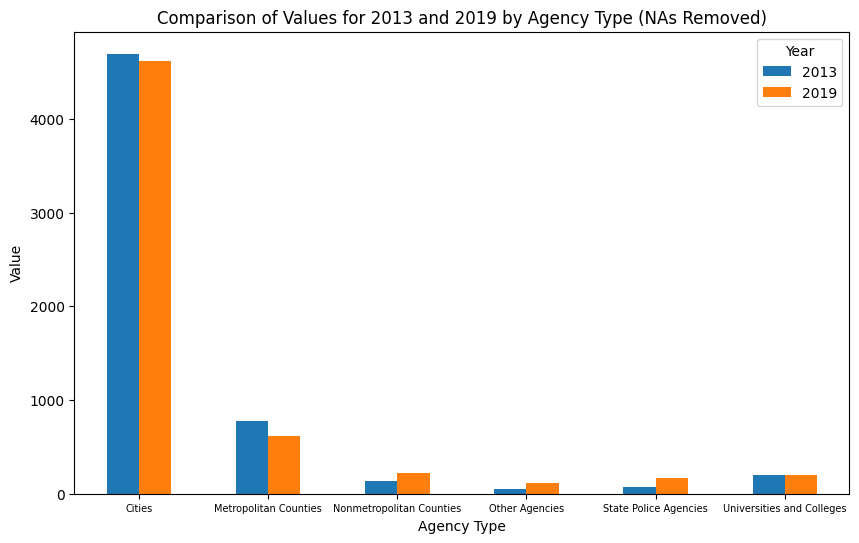

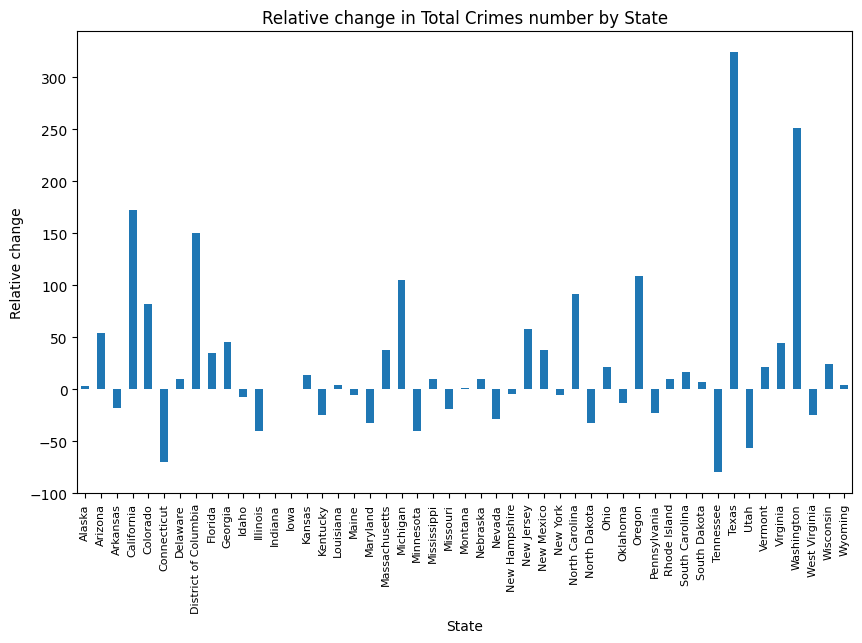

In [3]:
# Question 2
import pandas as pd
import matplotlib.pyplot as plt

url="https://drive.google.com/file/d/1g9Kng_eeMCvdsNQVPiGG4pD2qgdI4k44/view?usp=sharing"
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
df1 = pd.read_csv(url)
df1['Year'] = 2013

df1['Race/Ethnicity/Ancestry'] = df1['Race'] + df1['Ethnicity']
column_order1 = ['Year', 'State', 'Agency type', 'Agency name', 'Race/Ethnicity/Ancestry', 'Religion', 'Sexual orientation', 'Disability', 'Gender', 'Gender Identity', '1st quarter', '2nd quarter', '3rd quarter', '4th quarter', 'Population', 'Total Crimes']
df_2013 = df1[column_order1]

url_2019 = "https://drive.google.com/file/d/13vym8rUFFufs9xUxuCYuMeYfVpPDkVJl/view?usp=sharing"
url_2019='https://drive.google.com/uc?id=' + url_2019.split('/')[-2]
df2 = pd.read_csv(url_2019)
df2['Year'] = 2019

column_order2 = ['Year', 'State', 'Agency type', 'Agency name', 'Race/Ethnicity/Ancestry', 'Religion', 'Sexual orientation', 'Disability', 'Gender', 'Gender Identity', '1st quarter', '2nd quarter', '3rd quarter', '4th quarter', 'Population', 'Total Crimes']
df_2019 = df2[column_order2]

final_data = pd.concat([df_2013, df_2019], ignore_index=True)

state_mapping = {
    'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ', 'Arkansas': 'AR', 'California': 'CA',
    'Colorado': 'CO', 'Connecticut': 'CT', 'Delaware': 'DE', 'Florida': 'FL', 'Georgia': 'GA',
    'Hawaii': 'HI', 'Idaho': 'ID', 'Illinois': 'IL', 'Indiana': 'IN', 'Iowa': 'IA',
    'Kansas': 'KS', 'Kentucky': 'KY', 'Louisiana': 'LA', 'Maine': 'ME', 'Maryland': 'MD',
    'Massachusetts': 'MA', 'Michigan': 'MI', 'Minnesota': 'MN', 'Mississippi': 'MS', 'Missouri': 'MO',
    'Montana': 'MT', 'Nebraska': 'NE', 'Nevada': 'NV', 'New_Hampshire': 'NH', 'New_Jersey': 'NJ',
    'New_Mexico': 'NM', 'New_York': 'NY', 'North_Carolina': 'NC', 'North Dakota': 'ND', 'Ohio': 'OH',
    'Oklahoma': 'OK', 'Oregon': 'OR', 'Pennsylvania': 'PA', 'Rhode_Island': 'RI', 'South_Carolina': 'SC',
    'South_Dakota': 'SD', 'Tennessee': 'TN', 'Texas': 'TX', 'Utah': 'UT', 'Vermont': 'VT',
    'Virginia': 'VA', 'Washington': 'WA', 'West_Virginia': 'WV', 'Wisconsin': 'WI', 'Wyoming': 'WY'
}

final_data['State Code'] = final_data['State'].map(state_mapping)

column_order3 = ['Year', 'State', 'State Code', 'Agency type', 'Agency name', 'Race/Ethnicity/Ancestry', 'Religion', 'Sexual orientation', 'Disability', 'Gender', 'Gender Identity', '1st quarter', '2nd quarter', '3rd quarter', '4th quarter', 'Population', 'Total Crimes']
final_data2 = final_data[column_order3]


indexing2 = ['Year', 'Agency type', 'Total Crimes']
bar_chart_data = final_data2[indexing2]

bar_chart_data_aggr = bar_chart_data.groupby(['Year', 'Agency type']).sum().reset_index()
bar_chart_data_2 = bar_chart_data_aggr.pivot(index='Agency type', columns='Year', values='Total Crimes')

bar_chart_data_clean = bar_chart_data_2.dropna()

ax = bar_chart_data_clean.plot(kind='bar', figsize=(10, 6), rot=0)
plt.xlabel('Agency Type')
plt.ylabel('Value')
plt.title('Comparison of Values for 2013 and 2019 by Agency Type (NAs Removed)')
plt.legend(title='Year')
ax.tick_params(axis='x', labelsize=7)
plt.show()

indexing3 = ['Year', 'State', 'Total Crimes']
bar_chart_data3 = final_data2[indexing3]

bar_chart_data_aggr2 = bar_chart_data3.groupby(['Year', 'State']).sum().reset_index()
bar_chart_data_4 = bar_chart_data_aggr2.pivot(index='State', columns='Year', values='Total Crimes')

bar_chart_data_clean2 = bar_chart_data_4.dropna()

bar_chart_data_clean2 = pd.DataFrame(bar_chart_data_clean2)
bar_chart_data_clean2['Difference'] = bar_chart_data_clean2[2019] - bar_chart_data_clean2[2013]

ax3 = bar_chart_data_clean2['Difference'].plot(kind='bar', figsize=(10, 6), rot=0)
plt.xlabel('State')
plt.ylabel('Relative change')
plt.title('Relative change in Total Crimes number by State')
ax3.tick_params(axis='x', labelsize=8)
plt.xticks(rotation=90)
plt.show()

In [4]:
import pandas as pd
from ipywidgets import interact
import ipywidgets as widgets
import plotly.express as px


url="https://drive.google.com/file/d/1g9Kng_eeMCvdsNQVPiGG4pD2qgdI4k44/view?usp=sharing"
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
data = pd.read_csv(url)
data = data.drop(['Race'], axis=1)
data = data.drop(['Ethnicity'], axis=1)
url_2019 = "https://drive.google.com/file/d/13vym8rUFFufs9xUxuCYuMeYfVpPDkVJl/view?usp=sharing"
url_2019='https://drive.google.com/uc?id=' + url_2019.split('/')[-2]
data_2019 = pd.read_csv(url_2019)
data = data.drop(['Agency type'], axis=1)
data = data.drop(['Agency name'], axis=1)
data = data.drop(['Population'], axis=1)
sum1 = (data.groupby(["State"]).sum().reset_index())
sum1 = sum1.drop(0)
sum1 = sum1.reset_index(drop=True)
data_2019 = data_2019.drop(['Agency type'], axis=1)
data_2019 = data_2019.drop(['Agency name'], axis=1)
data_2019 = data_2019.drop(['Population'], axis=1)
sum_2019 = (data_2019.groupby(["State"]).sum().reset_index())
sum_2019 = (sum_2019.drop([8, 11])).reset_index(drop=True)
sum1['Year'] = '2013'
sum_2019['Year'] = '2019'
df = pd.concat([sum1, sum_2019])
def plot(value):
    fig = px.bar(df, x="State", y=value, color='Year', color_discrete_map={'2013':'blue', '2019':'black'}, barmode='overlay')
    fig.show()
x = widgets.SelectionSlider(options=list([ 'Gender', 'Gender Identity', 'Religion', 'Sexual orientation', 'Race/Ethnicity/Ancestry', 'Disability', 'Total Crimes']), description='Motivation')
interact(plot, value=x)    

interactive(children=(SelectionSlider(description='Motivation', options=('Gender', 'Gender Identity', 'Religio…

<function __main__.plot(value)>

### Description

Question 1: While the first graph makes it extremely apparent that cities have an incredibly higher number of crimes as compared to universities, the second graph is where things get more interesting, albeit dicey. We can clearly see from just the scale that universities have a significantly higher crime rate than cities. In case of Minnesota, for example, universities have a 732% higher crime rate than cities. However, this can also be a bit misleading. Since a university typically has a few thousand people, as compared to a city's millions, even having 10-100 times the number of crimes gets shadowed by the population.

Question 2: Looking at the visualizations, especially the first one allows us to see that while the total number has gone up in 2019, it has not gone up significantly. And there are states where the number of crimes has decreased as well, relative to 2013. However, looking at the second visualization allows us to see that for most motivations, the number goes up for some states and goes down for others (with some anomalies like Ohio and disability). But looking at the first 2 plots, i.e., "Gender" and "Gender Identity" allows us to see that these crimes have almost exclusively increased. This is, in a way, perhaps a result of the recent rise in transphobia. 

---
## Black Hat Visualization

**Instructions:**
- Add your black hat visualization
- Add a description explaining your motivation and design process in producing this visualization (**max. 150 words**)

#### Visualization

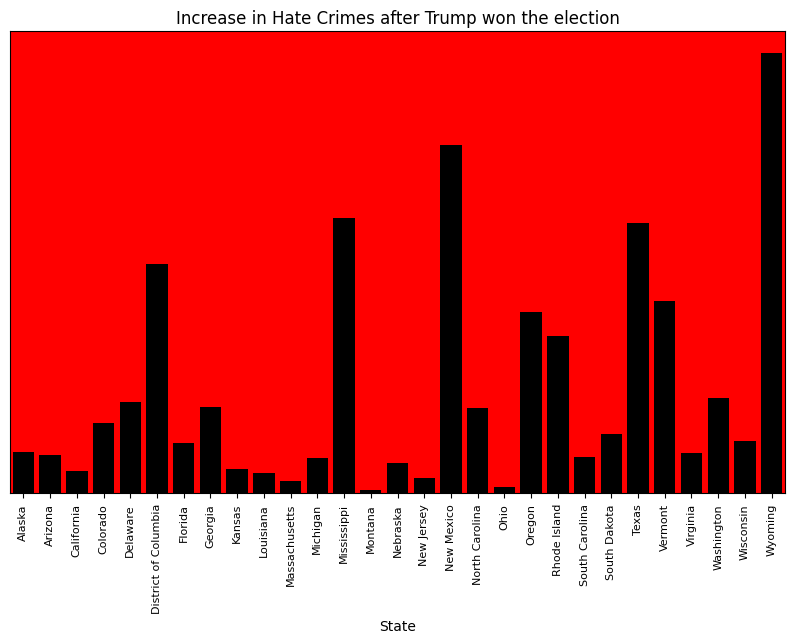

In [5]:
#Black hat

# Question 2
import pandas as pd
import matplotlib.pyplot as plt

url="https://drive.google.com/file/d/1g9Kng_eeMCvdsNQVPiGG4pD2qgdI4k44/view?usp=sharing"
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
df1 = pd.read_csv(url)
df1['Year'] = 2013

df1['Race/Ethnicity/Ancestry'] = df1['Race'] + df1['Ethnicity']
column_order1 = ['Year', 'State', 'Agency type', 'Agency name', 'Race/Ethnicity/Ancestry', 'Religion', 'Sexual orientation', 'Disability', 'Gender', 'Gender Identity', '1st quarter', '2nd quarter', '3rd quarter', '4th quarter', 'Population', 'Total Crimes']
df_2013 = df1[column_order1]

url_2019 = "https://drive.google.com/file/d/13vym8rUFFufs9xUxuCYuMeYfVpPDkVJl/view?usp=sharing"
url_2019='https://drive.google.com/uc?id=' + url_2019.split('/')[-2]
df2 = pd.read_csv(url_2019)
df2['Year'] = 2019

column_order2 = ['Year', 'State', 'Agency type', 'Agency name', 'Race/Ethnicity/Ancestry', 'Religion', 'Sexual orientation', 'Disability', 'Gender', 'Gender Identity', '1st quarter', '2nd quarter', '3rd quarter', '4th quarter', 'Population', 'Total Crimes']
df_2019 = df2[column_order2]

final_data = pd.concat([df_2013, df_2019], ignore_index=True)

state_mapping = {
    'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ', 'Arkansas': 'AR', 'California': 'CA',
    'Colorado': 'CO', 'Connecticut': 'CT', 'Delaware': 'DE', 'Florida': 'FL', 'Georgia': 'GA',
    'Hawaii': 'HI', 'Idaho': 'ID', 'Illinois': 'IL', 'Indiana': 'IN', 'Iowa': 'IA',
    'Kansas': 'KS', 'Kentucky': 'KY', 'Louisiana': 'LA', 'Maine': 'ME', 'Maryland': 'MD',
    'Massachusetts': 'MA', 'Michigan': 'MI', 'Minnesota': 'MN', 'Mississippi': 'MS', 'Missouri': 'MO',
    'Montana': 'MT', 'Nebraska': 'NE', 'Nevada': 'NV', 'New_Hampshire': 'NH', 'New_Jersey': 'NJ',
    'New_Mexico': 'NM', 'New_York': 'NY', 'North_Carolina': 'NC', 'North Dakota': 'ND', 'Ohio': 'OH',
    'Oklahoma': 'OK', 'Oregon': 'OR', 'Pennsylvania': 'PA', 'Rhode_Island': 'RI', 'South_Carolina': 'SC',
    'South_Dakota': 'SD', 'Tennessee': 'TN', 'Texas': 'TX', 'Utah': 'UT', 'Vermont': 'VT',
    'Virginia': 'VA', 'Washington': 'WA', 'West_Virginia': 'WV', 'Wisconsin': 'WI', 'Wyoming': 'WY'
}

final_data['State Code'] = final_data['State'].map(state_mapping)

column_order3 = ['Year', 'State', 'State Code', 'Agency type', 'Agency name', 'Race/Ethnicity/Ancestry', 'Religion', 'Sexual orientation', 'Disability', 'Gender', 'Gender Identity', '1st quarter', '2nd quarter', '3rd quarter', '4th quarter', 'Population', 'Total Crimes']
final_data2 = final_data[column_order3]

indexing2 = ['Year', 'Agency type', 'Total Crimes']
bar_chart_data = final_data2[indexing2]

bar_chart_data_aggr = bar_chart_data.groupby(['Year', 'Agency type']).sum().reset_index()
bar_chart_data_2 = bar_chart_data_aggr.pivot(index='Agency type', columns='Year', values='Total Crimes')

bar_chart_data_clean = bar_chart_data_2.dropna()

indexing3 = ['Year', 'State', 'Total Crimes']
bar_chart_data3 = final_data2[indexing3]

bar_chart_data_aggr2 = bar_chart_data3.groupby(['Year', 'State']).sum().reset_index()
bar_chart_data_4 = bar_chart_data_aggr2.pivot(index='State', columns='Year', values='Total Crimes')

bar_chart_data_clean2 = bar_chart_data_4.dropna()

bar_chart_data_clean2 = pd.DataFrame(bar_chart_data_clean2)
bar_chart_data_clean2['Difference'] = bar_chart_data_clean2[2019] - bar_chart_data_clean2[2013]


#everything above this is the exact as a previous cell but this is copied here to make sure every cell is independent.
bar_chart_data_clean2['% change'] = ((bar_chart_data_clean2[2019]/bar_chart_data_clean2[2013])-1)*100
bar_chart_data_clean3 = bar_chart_data_clean2[bar_chart_data_clean2['% change'] > 0.2]

ax3 = bar_chart_data_clean3['% change'].plot(kind='bar', figsize=(10, 6), rot=0)
plt.title('Increase in Hate Crimes after Trump won the election')
ax3.tick_params(axis='x', labelsize=8)
plt.xticks(rotation=90)
ax3.set_facecolor('red')
ax3.bar(bar_chart_data_clean3.index,bar_chart_data_clean3['% change'],color = 'black')
plt.tick_params(axis='y', which='both', left=False, right=False, labelleft=False, labelright=False)
plt.show()

#### Description

The Black Hat Visualization is a modified version of a graph from question 2 regarding the change in crime rates between 2013 and 2019. In order to make the graph fit the given narrative, all the states with lower hate crime stats in 2019 compared to 2013 have been excluded. The colors have been adjusted to be drastic and make the public feel unease and worried, as black and red are connected with death and blood. The naming of y-axis has been omitted to make the numbers have a bigger impact. Additionally, no reference is given to the actual base for the calculations. The title has been chosen fit a certain political narrative and appeal to certain public.